In [1]:
"""
Created on Fri Sep 22 12:26:33 2017

@author: Manikanda Krishnan V (06-02-02-10-22-17-1-14787)
"""


'\nCreated on Fri Sep 22 12:26:33 2017\n\n@author: Manikanda Krishnan V (06-02-02-10-22-17-1-14787)\n'

In [2]:
def padImage(im,filter_shape,padding_type="zero") :
    im_size = im.shape 
    padding_thickness = [x/2 for x in filter_shape]
    lower_corner = (padding_thickness[0]+im_size[0],padding_thickness[1]+im_size[1])
    im_col_flipped = im[:,-1::-1]
    im_row_flipped = im[-1::-1,:]
    im_both_flipped = im[-1::-1,-1::-1]
    zeros = np.zeros(im_size)
    if padding_type == "zero" :
            new_im = np.vstack([np.hstack([zeros,zeros,zeros]),
                                np.hstack([zeros,im,zeros]),
                                np.hstack([zeros,zeros,zeros])])

    elif padding_type == "symmetric" :
            new_im = np.vstack([np.hstack([im_both_flipped,im_row_flipped,im_both_flipped]),
                                np.hstack([im_col_flipped,im,im_col_flipped]),
                                np.hstack([im_both_flipped,im_row_flipped,im_both_flipped])])
    elif padding_type == "periodic" :
            new_im = np.vstack([np.hstack([im,im,im]),
                                np.hstack([im,im,im]),
                                np.hstack([im,im,im])])

    return new_im[im_size[0]-padding_thickness[0]:2*im_size[0]+padding_thickness[0],im_size[1]-padding_thickness[1]:2*im_size[1]+padding_thickness[1]]

In [3]:
def non_linear_neighborhood_processing(image,mask_shape,operator,padding_type="zero") :
    """
        operator is a function that takes a neighborhood of mask_shape as input and returns a value .
    """
    im = padImage(image,mask_shape,padding_type)
    new_image = np.zeros(image.shape)
    for x in range(0,image.shape[0]) :
        for y in range(0,image.shape[1]) :
            new_image[x,y] = operator(im[x:x+mask_shape[0],y:y+mask_shape[1]])
    return new_image            

In [4]:
def matched_filter(image,template,threshold) :
    template_centered = template - np.mean(template)
    template = template_centered/np.sqrt(np.sum(template_centered**2))
    def matched_filter_op(a) :
        a_centered = a - np.mean(a)
        a = a_centered/np.sqrt(np.sum(a_centered**2))
        return np.sum(a*template)
    output = non_linear_neighborhood_processing(image,template.shape,matched_filter_op,padding_type="symmetric")
    return output

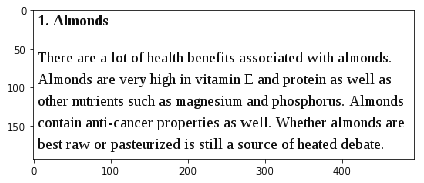

C:\Users\Sephiroth\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide
C:\Users\Sephiroth\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


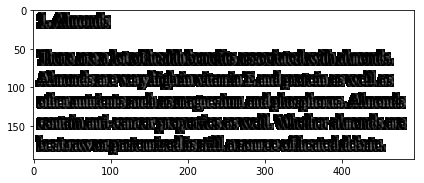

In [5]:
import numpy as np
from skimage import io,color,transform,img_as_ubyte
import matplotlib.pyplot as plt

image_path = r"C:\Users\Sephiroth\Downloads\iisc\DIP codes\ocr.png"
im = color.rgb2gray(io.imread(image_path))
io.imshow(im)
plt.show()

template = im[59:68,158:166]


output = matched_filter(im,template,0.99999)
io.imshow(output)
plt.show()



C:\Users\Sephiroth\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide


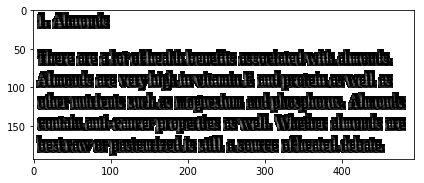

In [6]:

template = im[59:69,59:65]


output = matched_filter(im,template,0.99999)
io.imshow(output)
plt.show()


We notice the bright white spots at the centers of the letter e denoting high correlation values for them. 